<h1>
    Breast Cancer Prediction
</h1>

<h2>
    Importing Packages
</h2>

In [7]:
#import required packages
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppressing FutureWarning for developer-related warnings
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split #will be used to split the data to train and test
from sklearn import tree
from sklearn import metrics #will be used to calculate assessment metrics
from sklearn.metrics import classification_report #will be used to compute confusion matrix and AUC
from sklearn.metrics import confusion_matrix #will be used to compute confusion matrix and AUC
import matplotlib.pyplot as plt #will be used to generate ROC plot

from sklearn.ensemble import RandomForestClassifier

<h3>
    Import Data and Intialize Data Frame
</h3>

In [8]:
cancer = pd.read_csv("data.csv")
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


<h3>
    Drop Unnecessary Columns
</h3>

In [9]:
cancer['target']=cancer['diagnosis'].map({'M':0,'B':1})
cancer = cancer.drop(["diagnosis"],axis=1)
cancer = cancer.drop(["Unnamed: 32"], axis = 1)

In [10]:
y= cancer.target                             #define your target variable
x_features = cancer.drop(["target"],axis=1)  #define your features

x_features.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>
    Declaring Test and Train Data
</h3>

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape

(398, 31)

In [13]:
x_test.shape

(171, 31)

<h3>
    Decision Tree Clasifier
</h3>

In [14]:
tree_model = tree.DecisionTreeClassifier(max_depth=7)
tree_model.fit(x_train,y_train)

print(tree_model.score(x_test,y_test), tree_model.score(x_train,y_train))

0.9415204678362573 1.0


<p>
    We can see that the classifier over-fitted due to a train score of 1 and test of 0.91.
</p>

<h3>
    Random Forest Classifier
</h3>

In [15]:
# Limit max depth
rf_model = RandomForestClassifier(max_depth = 9, n_estimators=10)

# Train
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
print(rf_model.score(x_test,y_test), rf_model.score(x_train,y_train))

0.9649122807017544 1.0


<h3>
    We can see that Random Forest has a higher accuracy so we use that for further analysis
</h3>

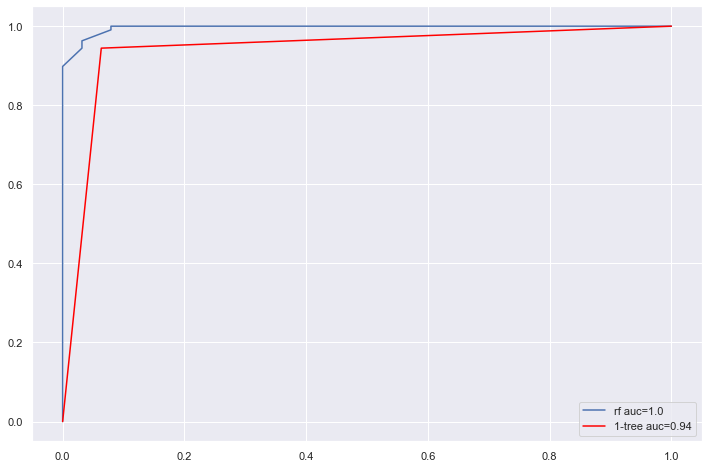

In [17]:
#ROC CURVE FOR RANDOM FOREST
y_pred_proba_rf = rf_model.predict_proba(x_test)[::,1] #pull the probabilities of having a heart disease
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf) #calculate the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf).round(2) #calculate the area under the curve (AUC)
plt.figure(figsize=(12, 8)) #specify plot size
plt.plot(fpr,tpr,label="rf auc="+str(auc)) #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

#ROC CURVE FOR 1 TREE
y_pred_proba_tree = tree_model.predict_proba(x_test)[::,1] #pull the probabilities of having a heart disease
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_tree) #calculate the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_tree).round(2) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="1-tree auc="+str(auc),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

In [18]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

<h3>
    Feature Importance
</h3>

In [19]:
feature_importances

,importance
concavity_mean,0.197380
perimeter_worst,0.171251
area_worst,0.105849
concave points_mean,0.102125
radius_mean,0.073435
area_mean,0.069121
perimeter_mean,0.055463
concave points_worst,0.039255
radius_worst,0.035892
concavity_worst,0.022922


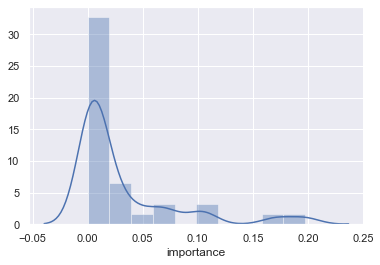

In [20]:
sns.distplot(feature_importances['importance']);

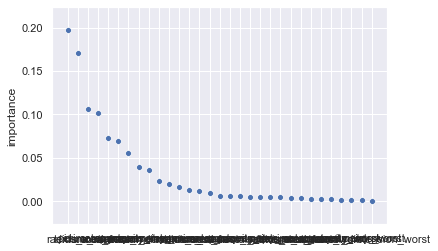

In [21]:
sns.scatterplot(x = x_train.columns, y = 'importance', data =feature_importances);